Compares solar data to Venus data taken with telescope

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pan
from glob import glob
%matplotlib inline

In [2]:
# Extracts data from file
def get_data(name):
    # Open the first file and read the first two lines
    f=open(name,'r')
    obs = f.readline()
    wlen=f.readline()
    f.close()
    # Saves wavelengths from the second line
    wlen = np.array([float(i) for i in wlen.split(',')[1:]])
    obs_time = obs[12:]
    # Reads the rest of the data
    dat = np.loadtxt(name,skiprows=2,delimiter=',')
    # Saves time and flux data
    time = dat[:,0]
    allflux = dat[:,1:]
    return wlen,allflux,time,obs_time

In [71]:
def polyreduce(getlcout):
    obs,flux,comp_flux,ot = getlcout
    t_start = 14.5
    t_end = 23
    
    # Fit resulting light curve to polynomial
    a=np.polyfit(obs,flux,50)
    b=np.poly1d(a)
    # Divide light curve by fitted polynomial
    pflux = np.divide(flux,b(obs))

    # Fit resulting light curve to polynomial
    aa=np.polyfit(obs,comp_flux,50)
    bb=np.poly1d(aa)
    # Divide light curve by fitted polynomial
    comp_pflux = np.divide(comp_flux,bb(obs))-1

    plt.plot(obs,flux)
    plt.plot(obs,comp_flux)
    plt.plot(obs,b(obs))
    plt.plot(obs,bb(obs))
    plt.title('Raw Data and Fitted Polynomial: '+ot)
    plt.xlim(t_start,t_end)
    plt.show()

    plt.plot(obs,pflux,alpha=.7)
    plt.plot(obs,comp_pflux,alpha=.7)
    plt.title('Poly-divided Lightcurves: '+ot)
    plt.xlim(t_start,t_end)
    plt.show()

    flat_flux_fun = np.divide(np.add(pflux,1),np.add(comp_pflux,1))
    plt.plot(obs,flat_flux_fun)
    plt.xlim(t_start,t_end)
    plt.title('Full Dividede Lightcurve: '+ot)
    plt.show()

    h1h = pan.rolling_median(flat_flux_fun,1000)
    plt.plot(obs,h1h)
    plt.title('Median Combined Observation: '+ot)
    plt.xlabel('Local Time')
    plt.ylabel('Flux')
    plt.xlim(t_start,t_end)
    plt.show()
    return obs,flat_flux_fun,h1h

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


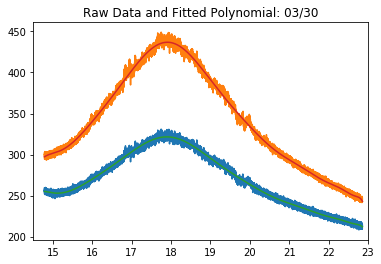

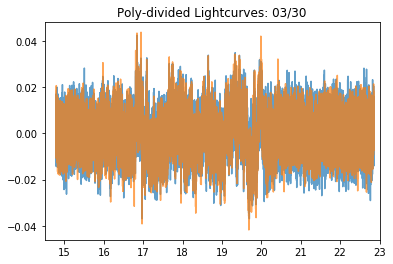

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


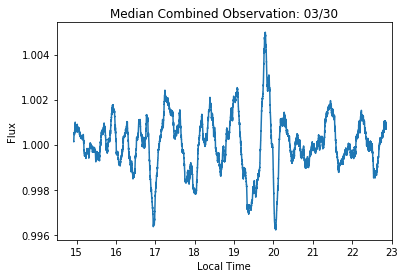

In [72]:
filename = 'data/reduced1_20180330.dat'
dat = np.loadtxt(filename,skiprows=2)
tn0,_,fn0 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'03/30'])

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


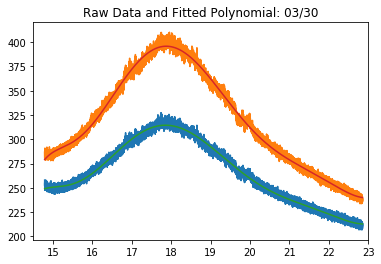

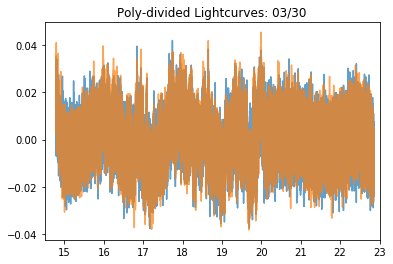

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


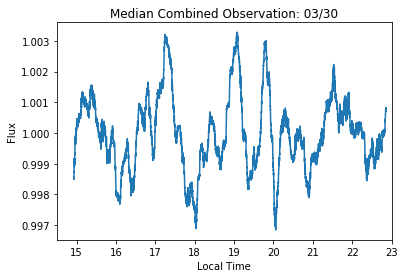

In [67]:
filename = 'data/reduced_20180330.dat'
dat = np.loadtxt(filename,skiprows=2)
t0,_,f0 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'03/30'])

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


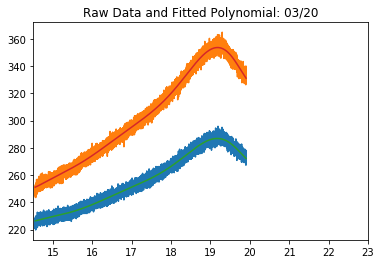

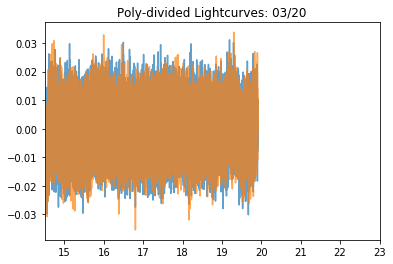

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


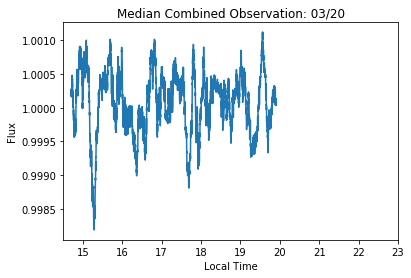

In [58]:
filename = 'data/reduced_20180320.dat'
dat = np.loadtxt(filename,skiprows=2)
t1,_,f1 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'03/20'])

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


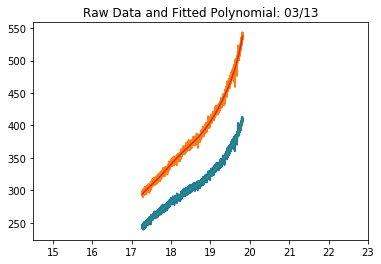

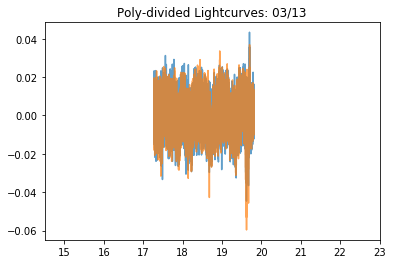

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


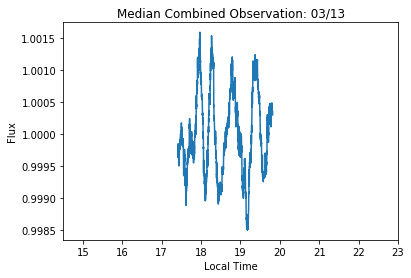

In [59]:
filename = 'data/reduced_20180313.dat'
dat = np.loadtxt(filename,skiprows=2)
t2,_,f2 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'03/13'])

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


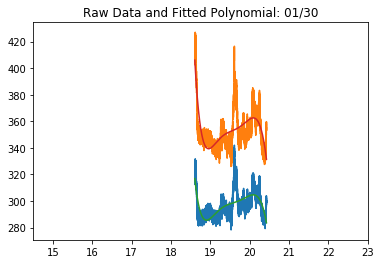

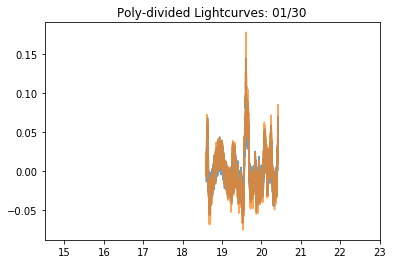

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


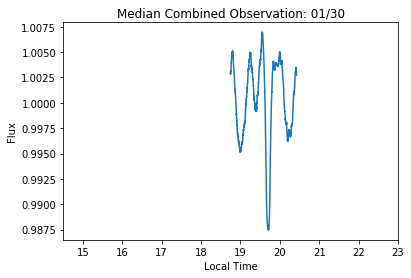

In [60]:
filename = 'data/reduced_20180130.dat'
dat = np.loadtxt(filename,skiprows=2)
t3,_,f3 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'01/30'])

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


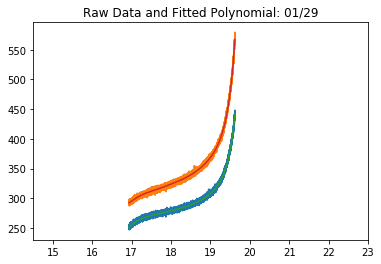

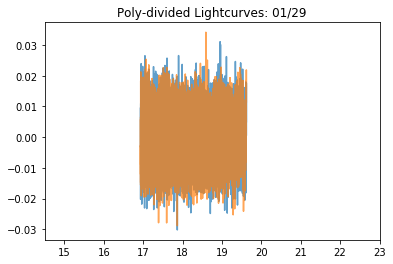

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


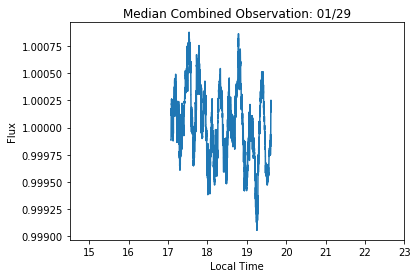

In [80]:
filename = 'data/reduced_20180129.dat'
dat = np.loadtxt(filename,skiprows=2)
t4,_,f4 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'01/29'])

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


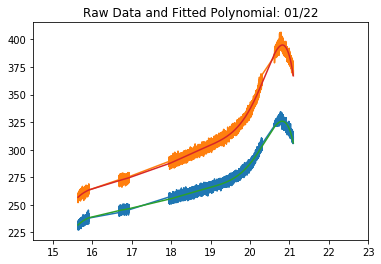

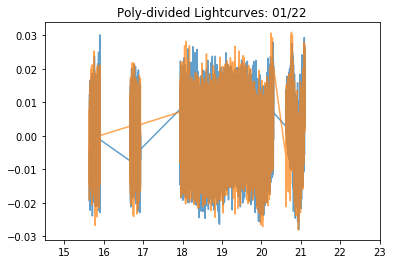

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


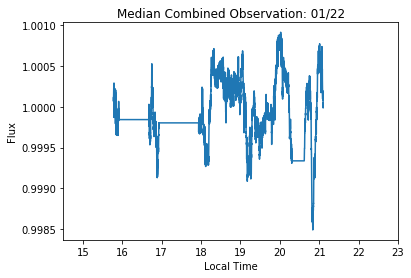

In [62]:
filename = 'data/reduced_20180122.dat'
dat = np.loadtxt(filename,skiprows=2)
t5,_,f5 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'01/22'])

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


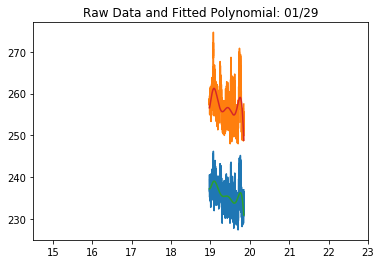

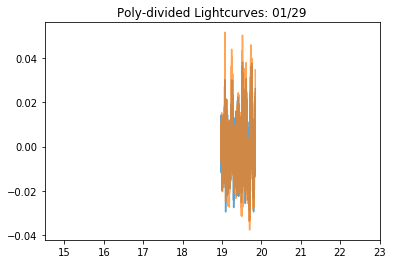

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


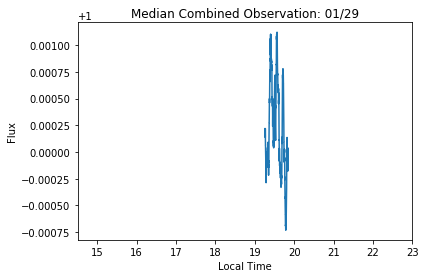

In [77]:
filename = 'venus_data/reduced1_20180404.dat'
dat = np.loadtxt(filename,skiprows=2)
t44,_,f44 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'01/29'])

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RankWarning: Polyfit may be poorly conditioned
  del sys.path[0]


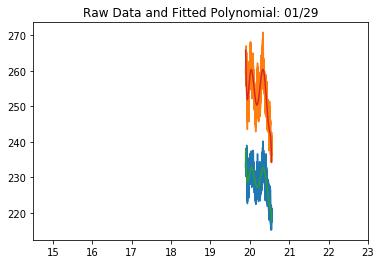

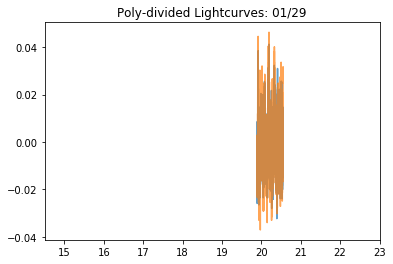

C:\Users\labuser\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version


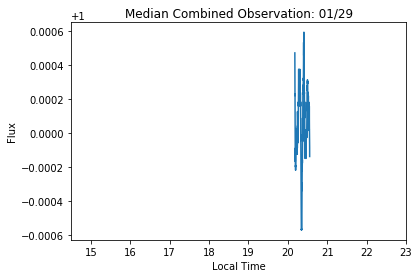

In [78]:
filename = 'venus_data/reduced2_20180404.dat'
dat = np.loadtxt(filename,skiprows=2)
t45,_,f45 = polyreduce([dat[:,0]+5,dat[:,1],dat[:,2],'01/29'])

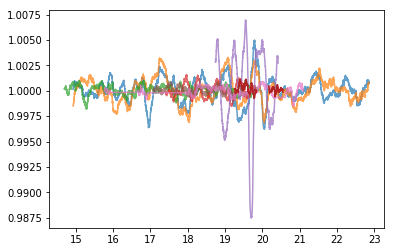

In [82]:
plt.plot(tn0,fn0,alpha=.7)
plt.plot(t0,f0,alpha=.7)
plt.plot(t1,f1,alpha=.7)
plt.plot(t2,f2,alpha=.7)
plt.plot(t3,f3,alpha=.7)
plt.plot(t4,f4,alpha=.7)
plt.plot(t5,f5,alpha=.7)
plt.plot(t44,f44,'firebrick')
plt.plot(t45,f45,'firebrick')
plt.show()

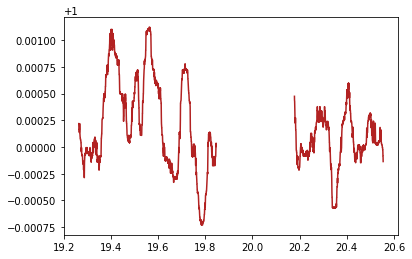

In [79]:
plt.plot(t44,f44,'firebrick')
plt.plot(t45,f45,'firebrick')
plt.show()